In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

#pd.show_versions()
#matplotlib.__version__
#sklearn.__version__

In [2]:
!pip install --upgrade seaborn
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


## Load the titanic dataset from Seaborn by using the load_dataset(‘titanic’) method.

In [3]:

# Specify the path to your CSV file
#csv_file_path = sns.load_dataset ('tips')

# Read the CSV file into a pandas dataframe
dfFileInput = sns.load_dataset ('titanic')

# Now you can work with the dataframe 'df' as needed
# For example, you can print the first few rows of the dataframe
print(dfFileInput.head())
dfFileInput.info()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [4]:
def Fn_missing_values(df):
# df is generic process the data and deliver it to a named dataframe
#df = dfTrain.copy()
# check for nulls or other missing values

    # Assuming 'df' is your pandas dataframe

    # Check for missing values using isnull()
    missing_values = df.isnull()

    # Check for missing values using isna() - alternative method
    missing_values2 = df.isna()
    #print(missing_values2)

    # Count the number of missing values in each column
    missing_values_count = missing_values.sum()

    # Print the result
    print("MissingValues Is Null\n", missing_values.sum(), '\n')
    print("MissingValues2 isna\n", missing_values2.sum())

    return missing_values

## Document the columns that are missing data both numerically (via a count) and visually (via an sns heatmap).

### Note age, deck, and embark_town columns have null or  isna values in them.

In [5]:
missingValues = Fn_missing_values(dfFileInput)
dfFileInput.sample(5)

MissingValues Is Null
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64 

MissingValues2 isna
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
648,0,3,male,NaN,0,0,7.550,S,Third,man,True,NaN,Southampton,no,True
696,0,3,male,44.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
183,1,2,male,1.0,2,1,39.000,S,Second,child,False,F,Southampton,yes,False
787,0,3,male,8.0,4,1,29.125,Q,Third,child,False,NaN,Queenstown,no,False
808,0,2,male,39.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True


In [6]:
def find_categorical_columns(df):
    categorical_columns = {}
    for column_name in df.columns:
        if isinstance(df[column_name].dtype, CategoricalDtype):
            categorical_columns[column_name] = True
        else:
            categorical_columns[column_name] = False
    return categorical_columns

In [7]:
categorical_info = find_categorical_columns(dfFileInput)
print("Categorical Columns:")
for column, is_categorical in categorical_info.items():
    if is_categorical:
        print(f"{column}: Yes")
    else:
        print(f"{column}: No")

Categorical Columns:
survived: No
pclass: No
sex: No
age: No
sibsp: No
parch: No
fare: No
embarked: No
class: Yes
who: No
adult_male: No
deck: Yes
embark_town: No
alive: No
alone: No


### By Inspection deck and class are both redundant and has issues with its category type for the logistic regression model. So Drop them.

In [8]:
dfFileInput = dfFileInput.drop(['deck', 'class'], axis=1)
print(Fn_missing_values(dfFileInput))

categorical_info = find_categorical_columns(dfFileInput)
print("Categorical Columns:")
for column, is_categorical in categorical_info.items():
    if is_categorical:
        print(f"{column}: Yes")
    else:
        print(f"{column}: No")

MissingValues Is Null
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64 

MissingValues2 isna
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64
     survived  pclass    sex    age  sibsp  parch   fare  embarked    who  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False

### Heatmap indicates that 'embarked' column also has missing values in addition to those found by isna or isnull.

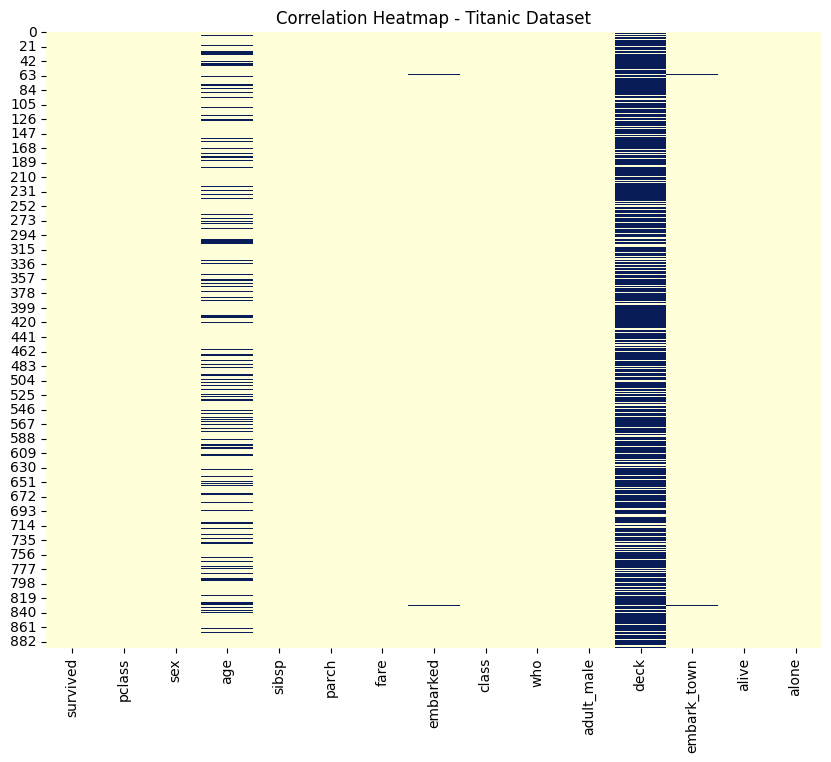

In [9]:
# Create a heatmap
plt.figure(figsize=(10, 8))
#sns.heatmap(missingValues, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
sns.heatmap(missingValues, cmap='YlGnBu', cbar=False)
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()

### Answer a series of questions
- Did More Women or Men die on the Titanic?

Answer: More Men died than Women. 

Who column was used instead of sex in order to avoid counting children in a question asking about male and female adults.

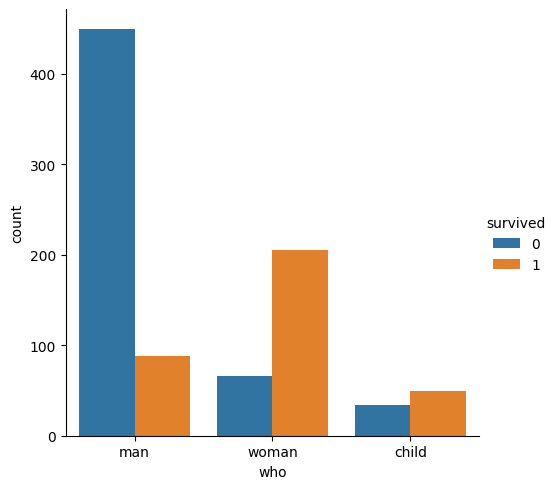

In [10]:
sns.catplot(x ="who", hue ="survived",
kind ="count", data = dfFileInput)

### The above graph indicates that many more men died on the Titanic

### Which Passenger class was more likley to survive?

- plotting class most likely to survive

Show that first class passengers were most likely to survive.

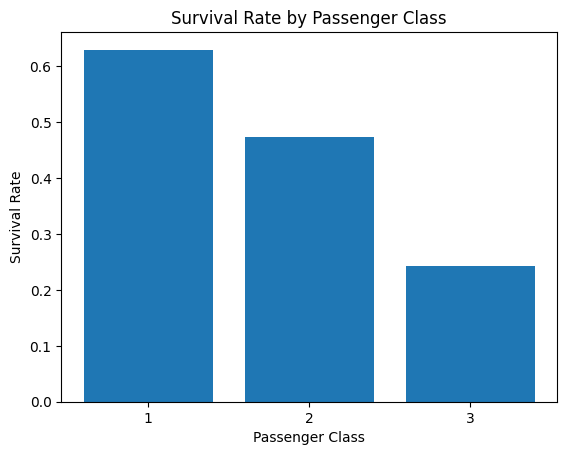

In [11]:
# Calculating the survival rate for each passenger class
survival_rate_by_class = dfFileInput.groupby('pclass')['survived'].mean()

# Creating a bar plot to visualize the survival rates
plt.bar(survival_rate_by_class.index, survival_rate_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.xticks([1, 2, 3])
plt.show()


### What does the distribution of fare look like

- plotting the distribution of fare using fare on the x-axis and distribution on the y.

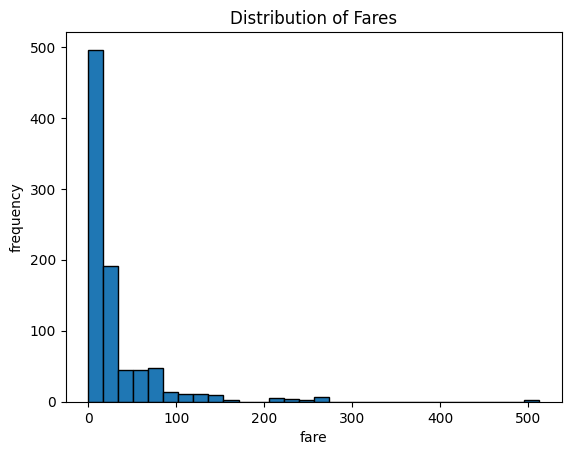

In [12]:

# Creating a histogram of fare distribution
plt.hist(dfFileInput['fare'], bins=30, edgecolor='k')
plt.xlabel('fare')
plt.ylabel('frequency')
plt.title('Distribution of Fares')
plt.show()


- used essentially the same plotting details but used kde plot to show smoothed curve suggesting a peak around 15.

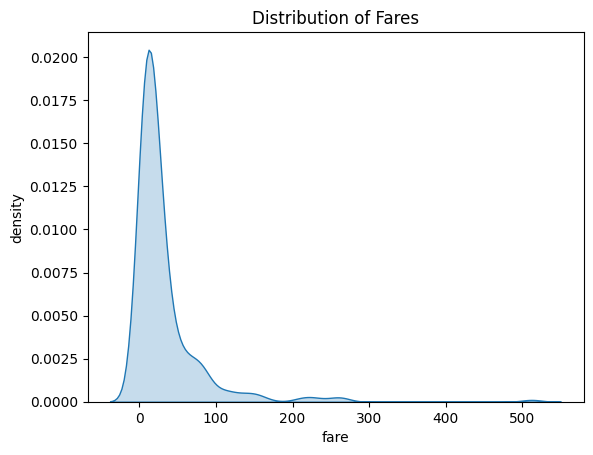

In [13]:

# Creating a kernel density plot of fare distribution
sns.kdeplot(dfFileInput['fare'], fill=True)
plt.xlabel('fare')
plt.ylabel('density')
plt.title('Distribution of Fares')
plt.show()


### What does the distribution of non-null age values look like.

- density plot of non-null ages on the titanic

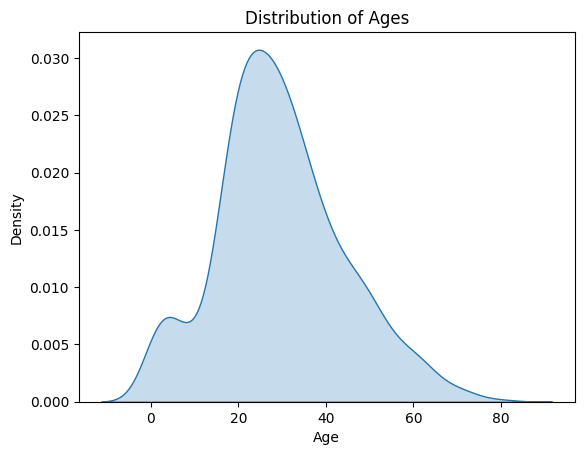

In [14]:
# Creating a kernel density plot of non-null age distribution
sns.kdeplot(dfFileInput['age'].dropna(), fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.show()


### What is the median age of each passenger class (pclass)

- Calculate and use box plot to display the median age of each passenger class

In [15]:
# Calculating the median age for each passenger class
medianAgeByClass = dfFileInput.groupby('pclass')['age'].median()

print(type(medianAgeByClass), medianAgeByClass)

def Fn_get_median_age_by_class(pclass):
    print(pclass)
    print(dfFileInput['pclass'])
    median_age = 1
    median_age = dfFileInput[dfFileInput['pclass'] == pclass]['age'].median()
    return median_age


<class 'pandas.core.series.Series'> pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64


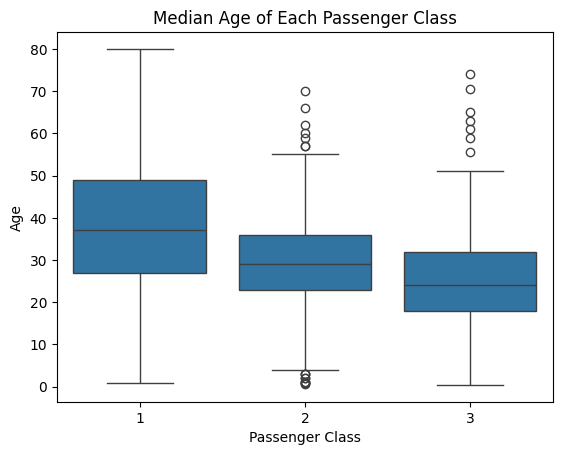

In [16]:

# Creating a box plot to show the median age of each passenger class
sns.boxplot(data=dfFileInput, x='pclass', y='age')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Median Age of Each Passenger Class')
plt.show()


## Midterm, Part 2: Data Cleansing. 
- Since there are so many missing values in Cabin, get rid of the cabin feature. 
- Define a function to impute age using the median of the passenger class you computed earlier.
- Drop the remaining records containing null values. 
- Show there are no remaining null values. 
- Convert categorical variables to numeric dummies using pandas’ get_dummies() method. Add these to your training dataframe. 
- Drop the categorical columns you converted earlier as well as name, ticket, and passengerId. 
- Create a feature set by dropping “Survived.” Your resulting feature set should include pclass, age, sibsp, parch, fare, and the categorical dummy columns you created earlier. 
- Implement a label dataframe by copying the contents of the Survived column of your training set to a new dataframe. 
- Split your clean data into a training and test set.

### Identify the Target Column: Survived is the target column


In [17]:
def Fn_target_convert(df, new_target, target_column, one_str, zero_str):     
#target_column = 'LoanStatus'
    #df = df.dropna(subset=[target_column])

    # Map "On or Ones string" to 1 and "Off or Zeros string" to 0
    #dfTrain[target_column] = df['Loan_Status'].map({'Y': 1, 'N': 0})
    df[new_target] = df[target_column].map({one_str: 1, zero_str: 0})

    # Save the modified DataFrame back to the CSV file
    df.to_csv('modifed'+'csv_file_path', index=False)

    df[new_target].isna().sum()
    return

In [18]:
# create a target column varible to be used later
targetColumn = 'survived'

### Is the target balanced or not balanced?

In [19]:
# Assuming your DataFrame is called df and the column name is 'column_name'
counts = dfFileInput[targetColumn].value_counts()

# Print the counts
print(counts, type(counts), counts.sum(), counts[0]/counts.sum(), counts[1]/counts.sum())

survived
0    549
1    342
Name: count, dtype: int64 <class 'pandas.core.series.Series'> 891 0.6161616161616161 0.3838383838383838


### Target is balanced

In [20]:
# output the makeup of the dataset

dfFileInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   who          891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alive        891 non-null    object 
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 78.4+ KB


### Since there are so many missing values in Deck, drop that column.

### Define a function to impute age using the median of the passenger class you computed earlier.
- To call it, use train[[‘age’, ‘pclass]].apply(impute_age,axis=1). 

### Define a function to impute age using the median of the passenger class computed earlier.

In [21]:
# Calculating the mean age for each passenger by class whether null or not
mean_age_by_class = dfFileInput.groupby('pclass')['age'].transform('mean')
#print(mean_age_by_class)

# Filling NaN values in the 'Age' column with the corresponding passenger class mean age
dfFileInput['age'] = dfFileInput['age'].fillna(mean_age_by_class)

# Verifying the result
print(dfFileInput['age'].isnull().sum())  # Check if there are any remaining missing values

#check if correct value 
dfFileInput.head(10)
#index 5 was null, and a value appropriate for third class is present

0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.2500,S,man,True,Southampton,no,False
1,1,1,female,38.00000,1,0,71.2833,C,woman,False,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.9250,S,woman,False,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.1000,S,woman,False,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.0500,S,man,True,Southampton,no,True
5,0,3,male,25.14062,0,0,8.4583,Q,man,True,Queenstown,no,True
6,0,1,male,54.00000,0,0,51.8625,S,man,True,Southampton,no,True
7,0,3,male,2.00000,3,1,21.0750,S,child,False,Southampton,no,False
8,1,3,female,27.00000,0,2,11.1333,S,woman,False,Southampton,yes,False
9,1,2,female,14.00000,1,0,30.0708,C,child,False,Cherbourg,yes,False


### Drop the remaining records containing null values. 


In [22]:
missingValues = Fn_missing_values(dfFileInput)
print(missingValues)

MissingValues Is Null
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64 

MissingValues2 isna
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64
     survived  pclass    sex    age  sibsp  parch   fare  embarked    who  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...   

### Remove what should be only two rows missing values

### Show there are no remaining null values. 

In [23]:
dfClean = dfFileInput.dropna()

missingValues = dfClean.isna()

print("MissingValues2 isna\n", missingValues.sum())

dfClean.info()

MissingValues2 isna
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   who          889 non-null    object 
 9   adult_male   889 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alive        889 non-null    object 
 12  alone        889 non-null    bool   
dtypes: bool(2)

### Impute the remaining columns
- unused in this assignment

In [24]:
def Fn_impute_missing (df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
    return

### Convert categorical variables to numeric dummies using pandas’ get_dummies() method. Add these to your training dataframe. 
- and alive is obviously a duplicate of survived, so dropping that one too, also so it doesn't get converted.
- Remember this dfClean dataframe. The Neural Net goes in a different direction for using categorical columns.

In [25]:
dfClean = dfClean.drop('alive', axis=1)

In [26]:
def Fn_Convert_Categoricals(df):
# Get the column data types
    column_types = df.dtypes

    print(column_types)

    # Identify categorical columns
    categorical_columns = column_types[column_types == 'object'].index.tolist()

    # Print the list of categorical columns
    print("Categorical Columns:", categorical_columns)

    #migrating to a different variable to 
    return(pd.get_dummies(df, 
                     columns=categorical_columns))

#### Converting categoricals

In [27]:
# function converts using get_dummies 
# and the output is returned which is saved in a dataframe variable indicating the dataset evolution
dfEncoded = Fn_Convert_Categoricals(dfClean)
dfEncoded.info()

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
who             object
adult_male        bool
embark_town     object
alone             bool
dtype: object
Categorical Columns: ['sex', 'embarked', 'who', 'embark_town']
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    int64  
 1   pclass                   889 non-null    int64  
 2   age                      889 non-null    float64
 3   sibsp                    889 non-null    int64  
 4   parch                    889 non-null    int64  
 5   fare                     889 non-null    float64
 6   adult_male               889 non-null    bool   
 7   alone                    889 non-null    bool   
 8   se

In [28]:
dfEncoded.sample(5)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
532,0,3,17.0,1,1,7.2292,True,False,False,True,True,False,False,False,True,False,True,False,False
90,0,3,29.0,0,0,8.0500,True,True,False,True,False,False,True,False,True,False,False,False,True
540,1,1,36.0,0,2,71.0000,False,False,True,False,False,False,True,False,False,True,False,False,True
811,0,3,39.0,0,0,24.1500,True,True,False,True,False,False,True,False,True,False,False,False,True
654,0,3,18.0,0,0,6.7500,False,True,True,False,False,True,False,False,False,True,False,True,False


### scaling data - scaled data not needed for Logistic Regression Model

### Split clean data into a training and test set.

In [29]:
train_df, test_df = train_test_split(dfEncoded, test_size=0.2, shuffle=False)

train_features = train_df.drop(targetColumn, axis=1)
train_target = train_df[targetColumn].values
test_features = test_df.drop(targetColumn, axis=1)
test_target = test_df[targetColumn].values

# Print the shapes of the training and test sets
print("Shape of train_features:", train_features.shape)
print("Shape of train_target:", train_target.shape)

print("Shape of test_features:", test_features.shape)
print("Shape of test_target:", test_target.shape)

train_features.sample(5)

Shape of train_features: (711, 18)
Shape of train_target: (711,)
Shape of test_features: (178, 18)
Shape of test_target: (178,)


,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
184,3,4.000000,0,2,22.025,False,False,True,False,False,False,True,True,False,False,False,False,True
636,3,32.000000,0,0,7.925,True,True,False,True,False,False,True,False,True,False,False,False,True
366,1,60.000000,1,0,75.250,False,False,True,False,True,False,False,False,False,True,True,False,False
284,1,38.233441,0,0,26.000,True,True,False,True,False,False,True,False,True,False,False,False,True
117,2,29.000000,1,0,21.000,True,False,False,True,False,False,True,False,True,False,False,False,True


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaleDatasetData = False
#df_target = dfClean[target_column]

#df_features = dfClean.drop(target_column, axis=1)

if scaleDatasetData:
    scaler = MinMaxScaler()
    train_features = scaler.fit_transform(train_features)
    print(type(scaled_train_features))
    scaled_train_features.shape
    print(train_features)

## MidTerm, Part 3: Model Training for Standard Model Building Experiments
- Implement a logistic regression model. 
- Implement a support vector classifier. 
- Implement an sgd classifier.
    -- Print out the classification reports, confusion matrices, and roc score and chart for each of these.
    -- Remember to set Probability=True for SVM and 
    -- use method=decision_function in a cross_val_predict instead of predict_proba for the SGD ROC plot.

In [31]:
model_name = "Logistic Regression"
LogisticRegressionModel = LogisticRegression(max_iter=2000)

LogisticRegressionModel.fit(train_features, train_target)

LogisticRegression(max_iter=2000)

In [32]:
reports_list = []

def Fn_print_report_tuple(report_tuple):
    print(report_tuple[0], "Classification Matrix")
    print(report_tuple[1])
    print(report_tuple[0], "Confusion_Matrix")
    print(report_tuple[2])

def Fn_Reports_list(model_name, classification_report, confusion_matrix):
    report_tuple = (model_name, classification_report, confusion_matrix)
    reports_list.append(report_tuple)
    Fn_print_report_tuple(report_tuple)
    return report_tuple

def Fn_print_reports_list():
    print("Reports list model name, classification matrix, confusion matrix")
    for report_tuple in reports_list:
        Fn_print_report_tuple(report_tuple)

### Run test data on trained model and print the performance results

In [33]:
LogisticRegressionModel.fit(train_features, train_target)

model_predictions = LogisticRegressionModel.predict(test_features)

lr_report = classification_report(test_target, model_predictions)
#print(lr_report)
lr_cm = confusion_matrix(test_target, model_predictions)
#print(lr_cm)
model_report = Fn_Reports_list(model_name, lr_report, lr_cm)

Logistic Regression Classification Matrix
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       115
           1       0.84      0.81      0.82        63

    accuracy                           0.88       178
   macro avg       0.87      0.86      0.86       178
weighted avg       0.88      0.88      0.88       178

Logistic Regression Confusion_Matrix
[[105  10]
 [ 12  51]]


### Plot the Receiver Operating Characteristic 

In [34]:
def Fn_RocScoreAndCurve(modelName, fittedModel, trainFeatures, trainTarget, methodStr):
    
    #print(trainFeatures.shape, trainTarget.shape)
    # Use cross_val_predict with method='decision_function' to obtain the decision scores
    trainScores = cross_val_predict(fittedModel, trainFeatures, trainTarget, cv=5, method=methodStr)

    #print(trainScores.shape)
    # Calculate the ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(trainTarget, trainScores)
    auc_score = roc_auc_score(trainTarget, trainScores)
    print(modelName, "ROC AUC Score", auc_score)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=modelName +' ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(modelName+' Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

Logistic Regression ROC AUC Score 0.8407060506746076


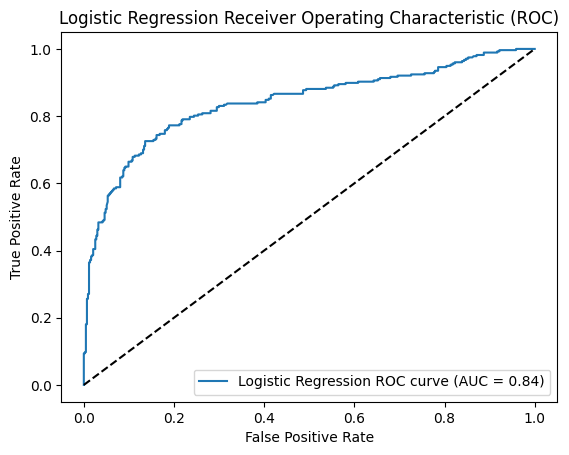

In [35]:
Fn_RocScoreAndCurve(model_name, 
                    LogisticRegressionModel, train_features, train_target, "decision_function")

### Print accuracy scores from cross validation

In [36]:
model_tuple = []

def Fn_print_scores_tuple(scores_tuple):
    print(scores_tuple[0], scores_tuple[1])
    print(scores_tuple[0], "mean", scores_tuple[1].mean())

scores_list = []

def Fn_scores_tuple(scores_name, scores):
    scores_tuple = (scores_name, scores)
    scores_list.append(scores_tuple)
    Fn_print_scores_tuple(scores_tuple)
    return scores_tuple

def Fn_print_scores_list():
    print("Scores List, model name, score, score mean")
    for score_tuple in scores_list:
        Fn_print_scores_tuple(score_tuple)

In [37]:
log_reg_scores = cross_val_score(LogisticRegressionModel, train_features, train_target, cv=5, scoring="accuracy")
model_tuple = Fn_scores_tuple('Cross-Validation Accuracy Scores', log_reg_scores)

Cross-Validation Accuracy Scores [0.8041958  0.8028169  0.83098592 0.80985915 0.78169014]
Cross-Validation Accuracy Scores mean 0.805909583374372


In [38]:
cvs_precision = cross_val_score(LogisticRegressionModel, train_features, train_target, cv=5,
                         scoring="precision")
model_tuple = Fn_scores_tuple('Cross-Validation Precision Scores', cvs_precision)

Cross-Validation Precision Scores [0.75       0.7755102  0.73846154 0.79166667 0.82051282]
Cross-Validation Precision Scores mean 0.7752302459445316


In [39]:
roc_auc_scores = cross_val_score(LogisticRegressionModel, train_features, train_target, cv=5,
                         scoring="roc_auc")
model_tuple = Fn_scores_tuple('Cross-Validation Roc AUC Scores', roc_auc_scores)

Cross-Validation Roc AUC Scores [0.81157635 0.82560084 0.88505747 0.87021944 0.83108389]
Cross-Validation Roc AUC Scores mean 0.8447075969339402


### Build a Support Vector Classifier

In [40]:
model_name = "Support Vector Classifier"
svm_model = SVC(probability=True)
svm_model.fit(train_features, train_target)

SVC(probability=True)

### Print Support Vector Classifier Performance Scores

In [41]:
model_predictions = svm_model.predict(test_features)

#print(model_name, "Model Classification Report:")
svm_report = classification_report(test_target, model_predictions)
#print(svm_report)
#print(model_name, "Model Confusion Matrix:")
svm_cm = confusion_matrix(test_target, model_predictions)
model_report = Fn_Reports_list(model_name, svm_report, svm_cm)

Support Vector Classifier Classification Matrix
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       115
           1       0.70      0.30      0.42        63

    accuracy                           0.71       178
   macro avg       0.71      0.62      0.61       178
weighted avg       0.71      0.71      0.67       178

Support Vector Classifier Confusion_Matrix
[[107   8]
 [ 44  19]]


### Print the Receiver Operating Characteristic for the Support Vector Classifier

Support Vector Classifier ROC AUC Score 0.7485401520570963


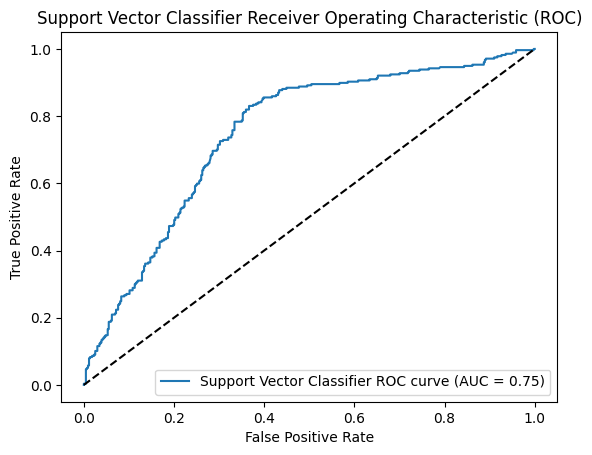

In [42]:
Fn_RocScoreAndCurve(model_name, 
                    svm_model, train_features, train_target, "decision_function")

### Build a Stochastic Gradient Descent Model

In [43]:
model_name = "Stochastic Gradient Descent"
sgd_model = SGDClassifier()
sgd_model.fit(train_features, train_target)

SGDClassifier()

### Print the Stochastic Gradient Descent Performance Report

In [44]:
model_predictions = sgd_model.predict(test_features)

#print(model_name, "Model Classification Report:")
sgd_report = classification_report(test_target, model_predictions)
#print(sgd_report)
#print(model_name, "Model Confusion Matrix:")
sgd_cm = confusion_matrix(test_target, model_predictions)
#print(sgd_cm)
model_report = Fn_Reports_list(model_name, sgd_report, sgd_cm)

Stochastic Gradient Descent Classification Matrix
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       115
           1       0.67      0.86      0.75        63

    accuracy                           0.80       178
   macro avg       0.79      0.81      0.79       178
weighted avg       0.82      0.80      0.80       178

Stochastic Gradient Descent Confusion_Matrix
[[88 27]
 [ 9 54]]


### Create and plot the Stochastic Gradient Descent ROC Graph

Stochastic Gradient Descent ROC AUC Score 0.6553095210367832


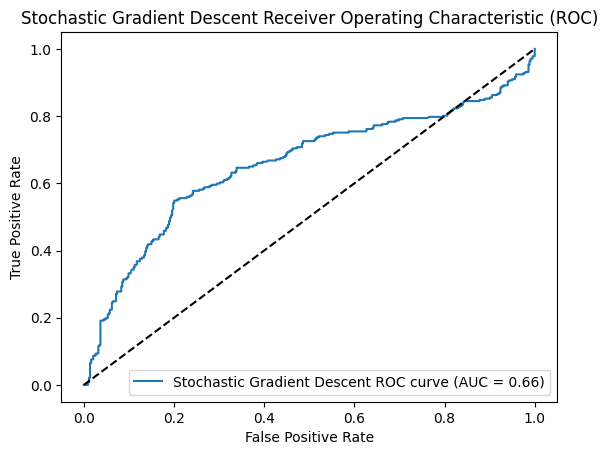

In [45]:
Fn_RocScoreAndCurve(model_name, 
                    sgd_model, train_features, train_target, "decision_function")

In [46]:
# also from activity5
svm_poly = Pipeline((
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3))
))

svm_poly.fit(train_features, train_target)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='poly'))])

### Print the Cross Validation Scorees for SVM Poly Model

In [47]:
svm_poly_scores = cross_val_score(svm_poly, train_features, train_target, cv=5, scoring="accuracy")
model_tuple = Fn_scores_tuple('SVM Poly Cross-Validation Accuracy Scores', svm_poly_scores)

SVM Poly Cross-Validation Accuracy Scores [0.81118881 0.8028169  0.84507042 0.81690141 0.75352113]
SVM Poly Cross-Validation Accuracy Scores mean 0.8058997340687479


In [48]:
"""
sgd_scores = cross_val_score(sgd_model, train_features, train_target, cv=5, scoring="accuracy")
print('SVM RBF Cross-Validation Accuracy Scores', sgd_scores)
print(sgd_scores.mean())
"""

'\nsgd_scores = cross_val_score(sgd_model, train_features, train_target, cv=5, scoring="accuracy")\nprint(\'SVM RBF Cross-Validation Accuracy Scores\', sgd_scores)\nprint(sgd_scores.mean())\n'

## Model Tuning
- See if scaling your input data affects your SVC model (implement a sklearn pipeline to combine scaling and instantiation of your model).
- Do a grid search of your pipeline classifier using the following parameter grid: {‘<your_svc_model_name>__kernel’: [‘rbf’], ‘<your_svc_model_name> __gamma’: [0.0001, 0.001, 0.01, 0.1, 1], ‘{‘<your_svc_model_name>__C’: [1,10,50,100,200,300]}.
- Print the best estimator, its parameters, and the resulting score. Apply this estimator to your test set
 - Implement a learning curve using your best estimator from the grid search.
    - The figure should have a title of “learning curve.”
    - Label the y-axis with “Score.”
    - Label the x-axis with “Training Examples.”
    - Make the training score red.
    - Make the validation score green.
    - What does this learning curve tell you?

### See if scaling your input data affects the SVC model
(implement a sklearn pipeline to combine scaling and instantiation of the model).

In [49]:
model_name = "SVC Scaled Data"

svm_clf_model = Pipeline((
    ("scaler", StandardScaler()),
    ("classifier", SVC())
))

svm_clf_model.fit(train_features, train_target)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [50]:
model_predictions = svm_clf_model.predict(test_features)

#print(model_name, "Model Classification Report:")
svm_clf_cr = classification_report(test_target, model_predictions)
#print(svm_clf_cr)
#print(model_name, "Model Confusion Matrix:")
svm_clf_cm = confusion_matrix(test_target, model_predictions)
#print(svm_clf_cm)
#print("SVM", "Model Confusion Matrix:")
#print(svm_cm)
model_report = Fn_Reports_list(model_name, svm_clf_cr, svm_clf_cm)

SVC Scaled Data Classification Matrix
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.82      0.81      0.82        63

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178

SVC Scaled Data Confusion_Matrix
[[104  11]
 [ 12  51]]


### Create the Receiver Operating Characteristic Plot for SVC with scaled data

SVC Scaled Data ROC AUC Score 0.8355820259861252


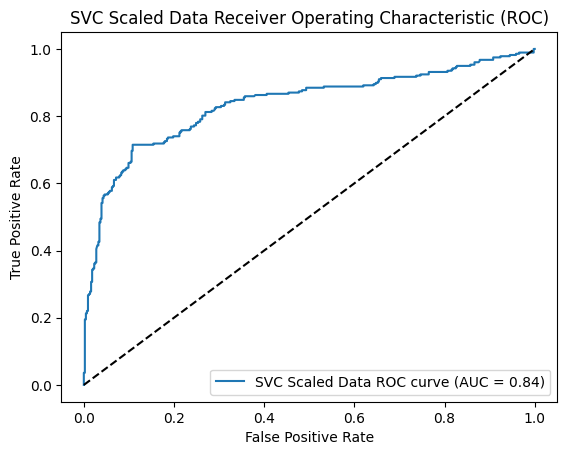

In [51]:
Fn_RocScoreAndCurve(model_name, 
                    svm_clf_model, train_features, train_target, "decision_function")

### See if Scaling the Data did improve the performance

Yes it did. False Positives went down and True Negatives went up.

### Do a grid search of your pipeline classifier using the following parameter grid: {‘<your_svc_model_name>__kernel’: [‘rbf’], ‘<your_svc_model_name> __gamma’: [0.0001, 0.001, 0.01, 0.1, 1], ‘{‘<your_svc_model_name>__C’: [1,10,50,100,200,300]}.

In [52]:
# Define the parameter grid for the grid search
param_grid = {
    'classifier__kernel': ['rbf'],
    'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'classifier__C': [1, 10, 50, 100, 200, 300]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=svm_clf_model, param_grid=param_grid, cv=5)
grid_search.fit(train_features, train_target)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
print("Grid Search Best Model", best_model)

# Print the best parameters found by grid search
print("Grid Search Best Parameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
best_model_predictions = best_model.predict(test_features)

# Evaluate the best model
accuracy = accuracy_score(test_target, best_model_predictions)
print("Accuracy:", accuracy)


#print("Grid Search CV", model_name, "Model Classification Report:")
svm_best_model_cr = classification_report(test_target, best_model_predictions)
#print(svm_best_model_cr)
#print("Grid Search CV", model_name, "Model Confusion Matrix:")
svm_best_model_cm = confusion_matrix(test_target, model_predictions)
#print(svm_best_model_cm)
#model_report = Fn_Reports_list("Grid Search Best Model"+best_model, svm_best_model_cr, svm_best_model_cm)

Grid Search Best Model Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=50, gamma=0.01))])
Grid Search Best Parameters: {'classifier__C': 50, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Accuracy: 0.8764044943820225


### Grid Search Best Model only run for reference purposes

The Grid Search Best Model has accuracy similar to the other models. But is included here for completeness.

In [53]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_
print("Grid Search Best Model", best_model)

# Print the best parameters found by grid search
print("Grid Search Best Parameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
best_model_predictions = best_model.predict(test_features)

# Evaluate the best model
accuracy = accuracy_score(test_target, best_model_predictions)
print("Accuracy:", accuracy)


#print("Grid Search CV", model_name, "Model Classification Report:")
svm_best_model_cr = classification_report(test_target, best_model_predictions)
#print(svm_best_model_cr)
#print("Grid Search CV", model_name, "Model Confusion Matrix:")
svm_best_model_cm = confusion_matrix(test_target, model_predictions)
#print(svm_best_model_cm)
model_report = Fn_Reports_list(best_model, svm_best_model_cr, svm_best_model_cm)

Grid Search Best Model Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=50, gamma=0.01))])
Grid Search Best Parameters: {'classifier__C': 50, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Accuracy: 0.8764044943820225
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=50, gamma=0.01))]) Classification Matrix
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       115
           1       0.90      0.73      0.81        63

    accuracy                           0.88       178
   macro avg       0.88      0.84      0.86       178
weighted avg       0.88      0.88      0.87       178

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=50, gamma=0.01))]) Confusion_Matrix
[[104  11]
 [ 12  51]]


### Implement a learning curve using your best estimator from the grid search.

A Learning curve with converging plots indicates the model is performing well.

In [54]:
# Assuming you have already obtained the best_model from the grid search

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, train_features, train_target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


### Plot the Learning Curve

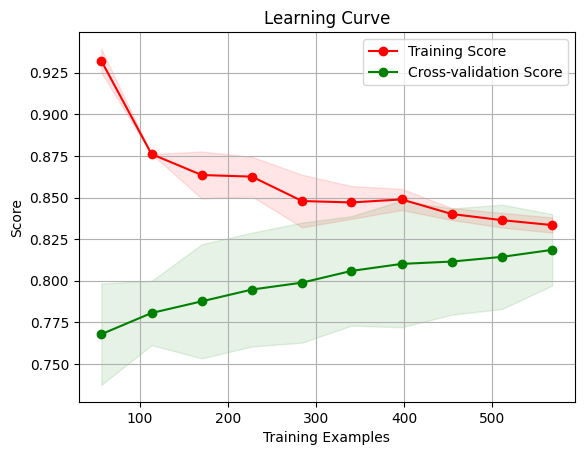

In [55]:
# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

## Learning Curve
The learning curve shows a steady convergence which means the model is not overfitted nor underfitted, and should be considered a 'good fit.'

###

### Print the accumulated accuracy and scores from the different model runs.

- If one of the stands out, it should be considered best in class and the standard by which the Deep Neural Network should be compared.

In [56]:
Fn_print_scores_list()
print("\n")
Fn_print_reports_list()

Scores List, model name, score, score mean
Cross-Validation Accuracy Scores [0.8041958  0.8028169  0.83098592 0.80985915 0.78169014]
Cross-Validation Accuracy Scores mean 0.805909583374372
Cross-Validation Precision Scores [0.75       0.7755102  0.73846154 0.79166667 0.82051282]
Cross-Validation Precision Scores mean 0.7752302459445316
Cross-Validation Roc AUC Scores [0.81157635 0.82560084 0.88505747 0.87021944 0.83108389]
Cross-Validation Roc AUC Scores mean 0.8447075969339402
SVM Poly Cross-Validation Accuracy Scores [0.81118881 0.8028169  0.84507042 0.81690141 0.75352113]
SVM Poly Cross-Validation Accuracy Scores mean 0.8058997340687479


Reports list model name, classification matrix, confusion matrix
Logistic Regression Classification Matrix
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       115
           1       0.84      0.81      0.82        63

    accuracy                           0.88       178
   macro avg       0.87  

## The Best of the Logistic Regression class models peformed with accuracy between 87% and 88%.

Accuracy isn't the only important metric, and depending upon the application the other measurements may be more important. The question to be answered is can a Deep Neural Network compete with these less complex modeling systems.



###

## Create Neural Network Model - compare its performance with the machine learning models

#### A template of a Deep Neural Network model was copied into this notebook.

- the exercise is to study how much work it takes to adapt previously working source code
- note where the source failed and what was needed to correct it
- the dataset is a categorical target while the template is outputs a ranged predictor, make note of those changes

In [57]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Fix random seed: https://pytorch.org/docs/stable/notes/randomness.html
torch.manual_seed(12)

### For a simple dataset, the conventional wisdom says keep it simple.
#### Input Layer has same number of nodes as total features of Dataset.
#### Hidden Layer has same number of input nodes as Input Layer and half as many nodes for its output.
#### Output Layer has input node count same as hidden layer output and 1 output node matching the one categorial target column.
#### Sigmoid activation function was added to the output layer in order to produce 1 (yes) 0 (no) outputs

In [58]:
class DeepNN(nn.Module):
    """
    A deep feedforward neural network with multiple layers.
    
    Args:
        input_size (int): Size of the input. For Fashion MNIST, this would be 784.
        output_size (int): Size of the output layer. For Fashion MNIST classification, this would be 10.
        activation_func (callable): The activation function to be used in the hidden layers.
        
    Returns:
        torch.Tensor: Tensor output from the forward pass.
    """
    def __init__(self, input_size=784, hidden_size=10, output_size=1, activation_func=nn.ReLU()):
        super(DeepNN, self).__init__()
        print("DeepNN", input_size, hidden_size, output_size)
        # Define the network layers (linear)
        
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.act1   = activation_func
        
        self.layer2 = nn.Linear(hidden_size, hidden_size//2) # Your code here // 512 -> 256
        self.act2   = activation_func
        #self.layer3 = nn.Linear(hidden_size//2, hidden_size//4)# Your code here // 256 -> 128
        #self.act3   = activation_func
        """
        self.layer4 = nn.Linear(128, 64)# Your code here  // 128 -> 64
        self.act4   = activation_func
        
        self.layer5 = nn.Linear(64, 32)# Your code here // 64 -> 32
        self.act5   = activation_func
        """     
        self.output_layer = nn.Linear(hidden_size//2, output_size)
        self.sigmoid = nn.Sigmoid()

        self.printing = False

    def __class_print(self, object_name, object):
        if self.printing:
            print(object_name, object)
        
    def forward(self, x):
        """
        Forward pass of the neural network.
        
        Args:
            x (torch.Tensor): The input tensor.
        
        Returns:
            torch.Tensor: The output tensor after passing through the network.
        
        x = self.act1(self.layer1)
        x = self.act2(self.layer2)
        x = self.act3(self.layer3)
        x = self.act4(self.layer4)
        x = self.act5(self.layer5)
        """

        self.__class_print("forward x", x)
        x = self.act1(self.layer1(x))
        self.__class_print("forward x layer 1", x)
        x = self.act2(self.layer2(x))
        self.__class_print("forward x layer 2", x)
        """
        x = self.act3(self.layer3(x))
        self.__class_print("forward x layer 3", x)
        x = self.act4(self.layer4(x))
        x = self.act5(self.layer5(x))
        """
        x = self.output_layer(x)  # Added this line to apply the output layer
        x = self.sigmoid(x)
        self.__class_print("forward x sigmoid", x)

        return(x)

    def print_weights_and_bias(self):
        print("Layer 1 Weights:", self.layer1.weight)
        print("Layer 1 Bias:", self.layer1.bias)

        print("Layer 2 Weights:", self.layer2.weight)
        print("Layer 2 Bias:", self.layer2.bias)

        #print("Layer 3 Weights:", model.layer3.weight)#
        #print("Layer 3 Bias:", model.layer3.bias)

        print("Output Layer Weights:", self.output_layer.weight)
        print("Output Layer Bias:", self.output_layer.bias)

### Keeping the Deep Neural Network Model Simple
#### Input size same as dataset features
#### Hidden size same as input size
#### Output size is 1 due to categorical output of one target column

In [59]:
input_size = 10 # specify the number of input features
hidden_size = 10  # you can adjust this number
output_size = 1

model = DeepNN(input_size, hidden_size, output_size)

#model.print_weights_and_bias()

DeepNN 10 10 1


### Use high performance acceleration hardware if available

Select the device and print out which one is in use

In [60]:
# Fetching the device that will be used throughout this notebook

# Check if CUDA (GPU support) is available, otherwise use CPU.
# This allows the code to be run on machines without a GPU.
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")

# Print out the device being used (for clarity and debugging purposes).
print("Using device", device)

Using device cpu


###

### Begin from same place as with machine learning model initial EDA and look for missing values

In [61]:
missingValues = Fn_missing_values(dfFileInput)
print(missingValues)

MissingValues Is Null
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64 

MissingValues2 isna
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64
     survived  pclass    sex    age  sibsp  parch   fare  embarked    who  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...   

### Drop Columns with missing values - as previously established they are redundant

In [62]:
dfClean = dfFileInput.dropna()

missingValues = dfClean.isna()

print("MissingValues2 isna\n", missingValues.sum())

dfClean.info()

MissingValues2 isna
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   who          889 non-null    object 
 9   adult_male   889 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alive        889 non-null    object 
 12  alone        889 non-null    bool   
dtypes: bool(2)

In [63]:
dfClean = dfClean.drop(['alive', 'embark_town'], axis=1)

In [64]:
dfClean.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
868,0,3,male,25.14062,0,0,9.5,S,man,True,True
755,1,2,male,0.67000,1,1,14.5,S,child,False,False
312,0,2,female,26.00000,1,1,26.0,S,woman,False,False
462,0,1,male,47.00000,0,0,38.5,S,man,True,True
883,0,2,male,28.00000,0,0,10.5,S,man,True,True


### Unlike the Machine Learning Model True False values are converted to 1's and zero's.

Convert the values and sample the dataframe to confirm they are no longer Trues and Falses

In [65]:
def Fn_convert_truefalse(df, tf_features_list):
    for column in tf_features_list:
        df[column] = df[column].astype(int)
    return df

In [66]:
tf_features_list = ['adult_male', 'alone']
Fn_convert_truefalse(dfClean, tf_features_list)

dfClean.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
545,0,1,male,64.00000,0,0,26.0000,S,man,1,1
850,0,3,male,4.00000,4,2,31.2750,S,child,0,0
769,0,3,male,32.00000,0,0,8.3625,S,man,1,1
589,0,3,male,25.14062,0,0,8.0500,S,man,1,1
307,1,1,female,17.00000,1,0,108.9000,C,woman,0,0


In [67]:
def Fn_impute_missing (df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
    return

### Convert Categorical Columns into using unique values 

#### Instead of using get dummies which explodes the number of nodes for the input layer
The List of those columns is short and supplied to a function that converts them. Upon completion of the operation, sample the dataframe to confirm the strings have been turned into values.

#### Then sample the dataframe to confirm the change

In [68]:
def Fn_Convert_Categoricals(df):
# Get the column data types
    column_types = df.dtypes

    print(column_types)

    # Identify categorical columns
    categorical_columns = column_types[column_types == 'object'].index.tolist()

    # Print the list of categorical columns
    print("Categorical Columns:", categorical_columns)

    #migrating to a different variable to 
    return(pd.get_dummies(df, 
                     columns=categorical_columns))

In [69]:
def Fn_Categorical_to_integer(df, column_list):
    for column_name in column_list:
        unique_categories = df[column_name].unique()
        category_mapping = {category: index for index, category in enumerate(unique_categories)}
        df[column_name] = df[column_name].map(category_mapping)
    return df

In [70]:
dfEncoded = Fn_Categorical_to_integer(dfClean, ['sex',  'embarked', 'who'])

In [71]:
dfEncoded.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
849,1,1,1,38.233441,1,0,89.1042,1,1,0,0
484,1,1,0,25.000000,1,0,91.0792,1,0,1,0
96,0,1,0,71.000000,0,0,34.6542,1,0,1,1
72,0,2,0,21.000000,0,0,73.5000,0,0,1,1
450,0,2,0,36.000000,1,2,27.7500,0,0,1,0


### Rerun missing values to make sure all feature columns are numeric.

In [72]:
missingValues = dfEncoded.isna()

print("MissingValues2 isna\n", missingValues.sum())

dfEncoded.info()

MissingValues2 isna
 survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    int64  
 3   age         889 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    int64  
 8   who         889 non-null    int64  
 9   adult_male  889 non-null    int64  
 10  alone       889 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 83.3 KB


### Scale the data using Min Max Scaler 

Only two columns need this scaling age and fare the rest are converted categoricals.

And rerun missing values to make sure the scaling took place.

In [73]:
def Fn_scalingDatasetData(num_features_list, df):
    # 1. Create an instance of StandardScaler
    scaler = MinMaxScaler()
    df[num_features_list] = scaler.fit_transform(df[num_features_list])
    return df

In [74]:
scaleDatasetData = True

if scaleDatasetData:
    numerical_features_list = ['age', 'fare']
    dfScaled = Fn_scalingDatasetData(numerical_features_list, dfEncoded)
    
else:
    dfScaled = dfEncoded.copy()
    
dfScaled.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
78,1,2,0,0.005152,0,2,0.056604,0,2,0,0
55,1,1,0,0.475163,0,0,0.069291,0,0,1,1
168,0,1,0,0.475163,0,0,0.050602,0,0,1,1
235,0,3,1,0.310639,0,0,0.014737,0,1,0,1
23,1,1,0,0.346569,0,0,0.069291,0,0,1,1


In [75]:
missingValues = dfScaled.isna()

print("MissingValues2 isna\n", missingValues.sum())

dfScaled.info()

MissingValues2 isna
 survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    int64  
 3   age         889 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    int64  
 8   who         889 non-null    int64  
 9   adult_male  889 non-null    int64  
 10  alone       889 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 83.3 KB


## Before Creating the Deep Neural Network Model

Perform a train test split

Print out the relative number of rows

In [76]:
train_dataframe, test_dataframe = train_test_split(dfScaled, test_size=0.2)
print("train_dataframe.shape", train_dataframe.shape)
train_dataframe.sample(5)

train_dataframe.shape (711, 11)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
703,0,3,0,0.308872,0,0,0.015111,2,0,1,1
72,0,2,0,0.258608,0,0,0.143462,0,0,1,1
836,0,3,0,0.258608,0,0,0.016908,0,0,1,1
224,1,1,0,0.472229,1,0,0.175668,0,0,1,0
581,1,1,1,0.484795,1,1,0.216430,1,1,0,0


In [77]:
print("test_dataframe.shape", test_dataframe.shape)
test_dataframe.sample(5)
input_size = 10

test_dataframe.shape (178, 11)


### Create Data Loader objects for the split train and test data components 

Create a class that provides utility functions to the transforms.

The call the custom class with a transform library function. This produces a dataloader ready object

In [78]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms  # Import the transforms module from torchvision

class CustomDataset(Dataset):
    def __init__(self, dataframe, target_column, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.target_column = target_column

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        sample = self.dataframe.iloc[idx]

        #print("idx", idx, "sample shape", sample.shape, type(sample))
    
        # Select all feature columns (excluding the target column if present)
        feature_columns = sample.drop(labels=[self.target_column])
    
        # Convert feature_columns into a PyTorch tensor
        features = torch.tensor(feature_columns.values, dtype=torch.float32)
        target = torch.tensor(sample[self.target_column], dtype=torch.float32)
        #print("__getitem__ features.shape", features.shape)
        #print("__getitem__ target.shape", target.shape)
        return features, target


In [79]:
train_dataset = CustomDataset(train_dataframe, 'survived', transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = CustomDataset(test_dataframe, 'survived', transform=transforms.Compose([transforms.ToTensor()]))


### Then use the DataLoader module to produce objects that can be fed into the DNN

In [80]:
from torch.utils.data import DataLoader

# Assuming you have already created train_dataset and test_dataset
# You can create DataLoader objects for both datasets as follows:

batch_size = 16

# Create train_loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create test_loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


### Run through the model to see how its layers are working. 

This provides a useful diagnostic on the code developed to this point. If the plots fail or look incorrect, double check the code.

Obviously for a very large dataset and very large DNN this is impractical. Small counts of rows would be recommended.


In [81]:
# Import Seaborn
import seaborn as sns

def plot_gradients_seaborn(named_parameters, act_fn_name, color="C0"):
    """
    Visualizes the gradients across different layers using Seaborn.
    
    Args:
        named_parameters (iterator): An iterator yielding both the name of the parameter 
                                     as well as the parameter itself.
        act_fn_name (str): The name of the activation function used in the model.
        color (str): Color in which we want to visualize the histogram.
        
    Returns:
        None. Displays histograms for gradient magnitudes of each layer.
    """
    grads = {name: params.grad.data.view(-1).cpu().clone().numpy() 
             for name, params in named_parameters if "weight" in name}
    
    columns = len(grads)
    print("columns", columns)
    fig, ax = plt.subplots(1, columns, figsize=(columns*3.5, 2.5))
    fig_index = 0
    for key in grads:
        #print("data", grads[key])
        key_ax = ax[fig_index%columns]
        sns.histplot(data=grads[key], bins=30, ax=key_ax, color=color, kde=True)
        key_ax.set_title(str(key))
        key_ax.set_xlabel("Grad magnitude")
        fig_index += 1
    fig.suptitle(f"Gradient magnitude distribution for activation function {act_fn_name}", fontsize=14, y=1.05)
    fig.subplots_adjust(wspace=0.45)
    titlestr = f"Gradient magnitude distribution for activation function {act_fn_name}.jpg"
    plt.savefig(titlestr)
    plt.show()
    plt.close()

In [82]:
def train_and_inspect_gradients(model, train_loader, criterion, optimizer, act_fn_name, color="C0"):
    """
    Train the model and inspect gradient flow.
    
    Args:
        model (DeepNN): The DeepNN model to train.
        train_loader (torch.utils.data.DataLoader): The data loader.
        criterion (callable): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        act_fn_name (str): The name of the activation function used in the model.
        color (str): Color for gradient visualization.
        
    Returns:
        None. Trains the model and displays gradient histograms.
    """

    # Use only one epoch for demonstration
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        #target = target.to(torch.long)
        target2 = target.to(torch.long)
        target = target.unsqueeze(1)
        #print("target2 type", type(target2), target2.shape, target2)
        
        optimizer.zero_grad()
        output = model(data.view(-1, 10))
        #print("output type", type(output), output.shape, output)
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        # For demonstration, inspect gradient after first batch
        if batch_idx == 0:
            plot_gradients_seaborn(model.named_parameters(), act_fn_name, color=color)
            break

### Train and run the DNN, collecting outputs for inspecting the weights and gradient magnitudes.

#### Show plots of gradients and weights

#### The plots initially showed a single bar at 0. The original target output shape was incompatible with the criterion functions.

DeepNN 10 10 1
columns 3


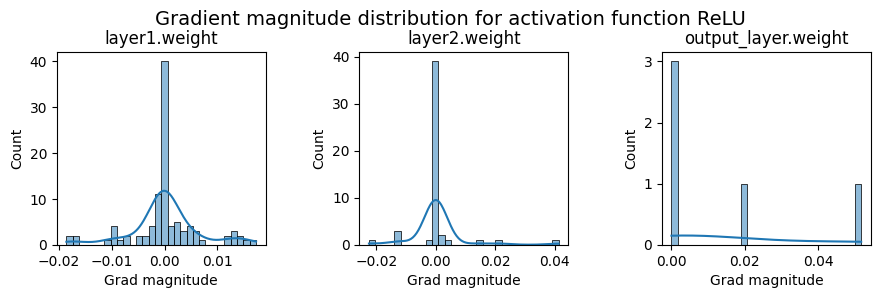

DeepNN 10 10 1
columns 3


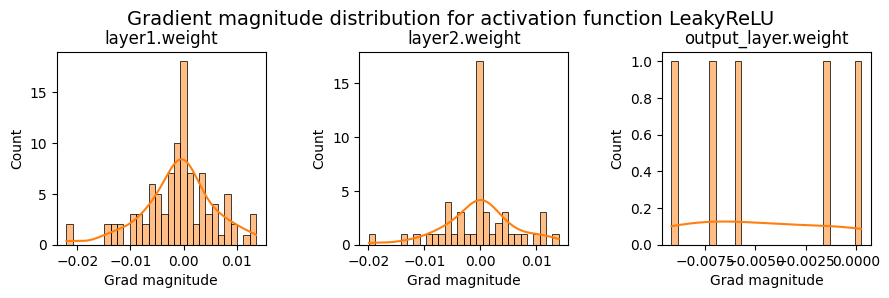

DeepNN 10 10 1
columns 3


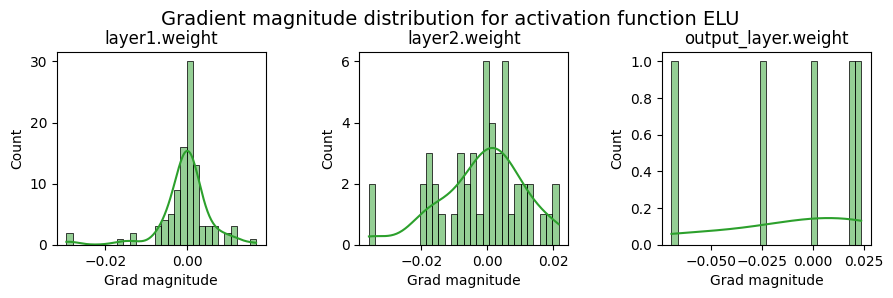

DeepNN 10 10 1
columns 3


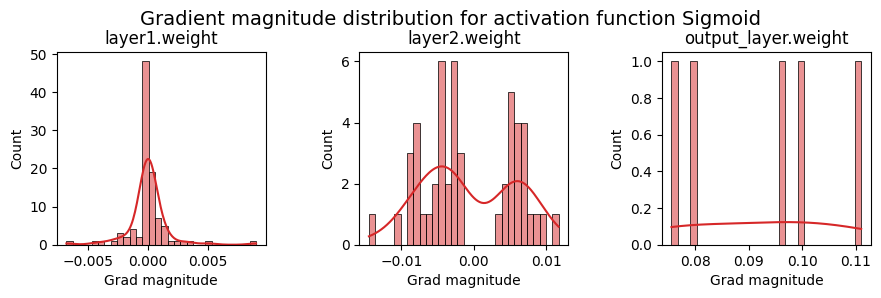

In [83]:
# We'll test the gradient flow for multiple activation functions to compare their behavior.
# The activation functions we'll be experimenting with are:
# ReLU, LeakyReLU, ELU, and Sigmoid.


#learning_rate = 0.0001  # you might want to tune this value - best accuracy was ELU @ 77.53
#learning_rate = 0.0005  # you might want to tune this value - best accuraxcy was ELU @ 80.47
learning_rate = 0.001  # you might want to tune this value - best accuracy was ELU @ 80.72
#learning_rate = 0.01  # accuracy was terrible best was RELU at 64.34

# List of activation functions to be used in our neural network
act_fn_list = [nn.ReLU(), nn.LeakyReLU(), nn.ELU(), nn.Sigmoid()]

# Corresponding names of the activation functions for display purposes
act_fn_names = ["ReLU", "LeakyReLU", "ELU", "Sigmoid"]

# Iterating over each activation function to:
# 1. Initialize our deep neural network with the given activation function.
# 2. Define the optimizer for training.
# 3. Train the network.

#optimizer_list = [optim.Adam, optim.SGD, optim.RMSprop] 

train_loader2 = train_loader

for i, act_fn in enumerate(act_fn_list):
    # Initialize the neural network with the current activation function and move it to the specified device
    
    net = DeepNN(input_size=input_size, hidden_size=hidden_size, output_size=1, activation_func=act_fn)
    
    # Define the optimizer for training. Here, we're using the Adam optimizer.
    
    #optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    # Train the network and visualize the gradient magnitudes using our custom function.
    # We also specify a unique color for each activation function's visualization for clarity.
    train_and_inspect_gradients(net, train_loader, torch.nn.functional.binary_cross_entropy, optimizer, act_fn_names[i], color=f"C{i}")

### Train and run several epochs then verifying those runs against the test set

#### Calculate and print accuracy scores.

#### Non-trivial debug time was spend on verifying the predicted output was legitimate.
#### Then comparing predicted output with actual output required additional correction to generate valid accuracy counts.

#### Number of epochs in original source code was 1.
#### Adding a run of 10 epochs showed better model performance in multi-epoch runs.
#### More than 10 epochs and the models showed repeated examples of overfitting.

#### Out of scope of this project is writing early stopping code. Something recommended if this code is intended for production.

In [84]:
def train_several_epochs(model, train_loader, criterion, optimizer, act_fn_name, color="C0", epochs=1):
    """
    Train the model and inspect gradient flow.
    
    Args:
        model (DeepNN): The DeepNN model to train.
        train_loader (torch.utils.data.DataLoader): The data loader.
        criterion (callable): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        act_fn_name (str): The name of the activation function used in the model.
        color (str): Color for gradient visualization.
        epochs (int): Number of training epochs.
        
    Returns:
        None. Trains the model and displays gradient histograms.
    """
    #print("len(train_loader.dataset)", len(train_loader.dataset))
    print("epochs", epochs)
    batch_count = 0
    model.train()
    cur_avg_loss = -1.0
    cur_accuracy = -1.0
    for epoch in range(epochs):
        epoch_loss = 0
        correct_preds = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            #print("data", data)
            targetX = target.unsqueeze(1)
            optimizer.zero_grad()
            output = model(data.view(-1, 10))
            loss = criterion(output, targetX)
            loss.backward()
            
            optimizer.step()

            # Update epoch loss
            epoch_loss += loss.item()
            
            # Update correct predictions
            #_, predicted = output.max(1)
            predicted = (output > 0.5).float()


            correct_preds = (predicted.squeeze() == target).float()
            correct_preds = correct_preds.sum().item()

            #correct_preds += (predicted == target).sum().item()
            #print("output", output)
            #print("target", target)
            #print("\ntargetX", targetX)
            #print("predicted", predicted)
            #print("correct_preds", correct_preds)
            #print("\noutput.max(1)", output.max(1),"\nend output.max")
            #print("epoch", epoch, "correct_preds", correct_preds, "(predicted == target).sum()", (predicted == target).sum().item())
            batch_count += 1
        
        # Calculate average loss and accuracy over the epoch
        #print("batch_count", batch_count, "len(output)", len(output), "len(target)", len(target))
        print("correct_preds", correct_preds)
        #print("len(train_loader)", len(train_loader))
        #print("epoch_loss", epoch_loss)
        avg_loss = epoch_loss / len(train_loader)
        accuracy = 100. * correct_preds / len(train_loader.dataset)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
        
    print(f"Epoch {epoch+1}/{epochs}, Best Loss: {cur_avg_loss:.4f}, Best Accuracy: {cur_accuracy:.2f}%")


# List of activation functions to be used in our neural network
act_fn_list = [nn.ReLU(), nn.LeakyReLU(), nn.ELU(), nn.Sigmoid()]

# Corresponding names of the activation functions for display purposes
act_fn_names = ["ReLU", "LeakyReLU", "ELU", "Sigmoid"]

# List of activation functions to be used in our neural network
#act_fn_list = [nn.ReLU(), nn.LeakyReLU(), nn.Sigmoid()]

# Corresponding names of the activation functions for display purposes
#act_fn_names = ["ReLU", "LeakyReLU", "Sigmoid"]

#learning_rate = 0.0001  # you might want to tune this value - best accuracy was ELU @ 77.53
#learning_rate = 0.0005  # you might want to tune this value - best accuraxcy was ELU @ 80.47
learning_rate = 0.001  # you might want to tune this value - best accuracy was ELU @ 80.72
#learning_rate = 0.01  # accuracy was terrible best was RELU at 64.34
# Train and visualize for each activation function.
for i, act_fn in enumerate(act_fn_list):
    print("Training with " + str(act_fn))
    net = DeepNN(input_size=input_size, hidden_size=hidden_size, output_size=1, activation_func=act_fn).to(device)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    train_several_epochs(net, train_loader2, torch.nn.functional.binary_cross_entropy, optimizer, act_fn_names[i], color=f"C{i}", epochs=1)
    print("--")
    train_several_epochs(net, train_loader2, torch.nn.functional.binary_cross_entropy, optimizer, act_fn_names[i], color=f"C{i}", epochs=10)

Training with ReLU()
DeepNN 10 10 1
epochs 1
correct_preds 5.0
Epoch 1/1, Loss: 0.6653, Accuracy: 0.70%
Epoch 1/1, Best Loss: -1.0000, Best Accuracy: -1.00%
--
epochs 10
correct_preds 7.0
Epoch 1/10, Loss: 0.6497, Accuracy: 0.98%
correct_preds 4.0
Epoch 2/10, Loss: 0.6294, Accuracy: 0.56%
correct_preds 3.0
Epoch 3/10, Loss: 0.5982, Accuracy: 0.42%
correct_preds 6.0
Epoch 4/10, Loss: 0.5568, Accuracy: 0.84%
correct_preds 6.0
Epoch 5/10, Loss: 0.5203, Accuracy: 0.84%
correct_preds 5.0
Epoch 6/10, Loss: 0.4951, Accuracy: 0.70%
correct_preds 6.0
Epoch 7/10, Loss: 0.4750, Accuracy: 0.84%
correct_preds 5.0
Epoch 8/10, Loss: 0.4670, Accuracy: 0.70%
correct_preds 5.0
Epoch 9/10, Loss: 0.4587, Accuracy: 0.70%
correct_preds 4.0
Epoch 10/10, Loss: 0.4567, Accuracy: 0.56%
Epoch 10/10, Best Loss: -1.0000, Best Accuracy: -1.00%
Training with LeakyReLU(negative_slope=0.01)
DeepNN 10 10 1
epochs 1
correct_preds 2.0
Epoch 1/1, Loss: 0.7267, Accuracy: 0.28%
Epoch 1/1, Best Loss: -1.0000, Best Accuracy: 

## Conclusions

With more than one epoch but some number at or below 10 epochs, for this dataset, reasonable accuracy numbers are produced.

A properly coded Deep Neural Network can compete with simpler Machine Learning models. However, the substantial tuning and hyperparameter experiments would be needed in order to attain similar results to a potentially unsupervised Machine Learning code base. 

The Goal of this project was not to explore a complex dataset with a Deep Neural Network, but to determine how much work and what are potential problem coding areas.

Issue number one: make sure your understand what type of model you're building Binary Categorcal Output or a Ranged Output Model. This requires properly setting up the dataset target column and the loss function for back propagation.

Issue number two: examine the objects being processed. Some comparisons or calculations will fail if the shape of those objects do not match. 
but other operations quietly fail and produce nonsense results rather than failing.

Issue number three: binary categorical outputs need a sigmoid output function for the output layer. Though model performance and output layer restuls should immediately indicate there is a problem.

Issue number four: additional tuning and hyperparameter exploration will be needed after initial prototyping, and that is just to get the model running well enough to start producing results comparable to the simpler model systems.